In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os
from matplotlib.ticker import MaxNLocator

In [30]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    print(folder_names)
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

In [31]:
read_csv_path = f"{full_path}/numReadPorts.csv"
write_csv_path = f"{full_path}/numWritePorts.csv"
read_img_path = f"{full_path}/numReadPorts.png"
write_img_path = f"{full_path}/numWritePorts.png"

In [32]:
read_df = pd.read_csv(read_csv_path)
write_df = pd.read_csv(write_csv_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/elizabeth/Desktop/Cambridge/Dissertation/data results/2025_04_14_20:59:54.568217/numReadPorts.csv'

In [ ]:
read_df

,rule_title,rule_description,user_defined_key,file,num_read_ports,count
0,load effective address,NaN,0,astar,0,582414
1,load effective address,NaN,0,astar,1,12425060015
2,load effective address,NaN,0,astar,2,10919109297
3,load effective address,NaN,0,astar,3,2418151809
4,load effective address,NaN,0,astar,4,6753050
...,...,...,...,...,...,...
287,overall results,NaN,0,xalancbmk,0,1867694
288,overall results,NaN,0,xalancbmk,1,255228975
289,overall results,NaN,0,xalancbmk,2,150090746
290,overall results,NaN,0,xalancbmk,3,103787537


In [ ]:
read_grouped = read_df.groupby(['rule_title'], dropna=False, sort=False)
write_grouped = write_df.groupby(['rule_title'], dropna=False, sort=False)

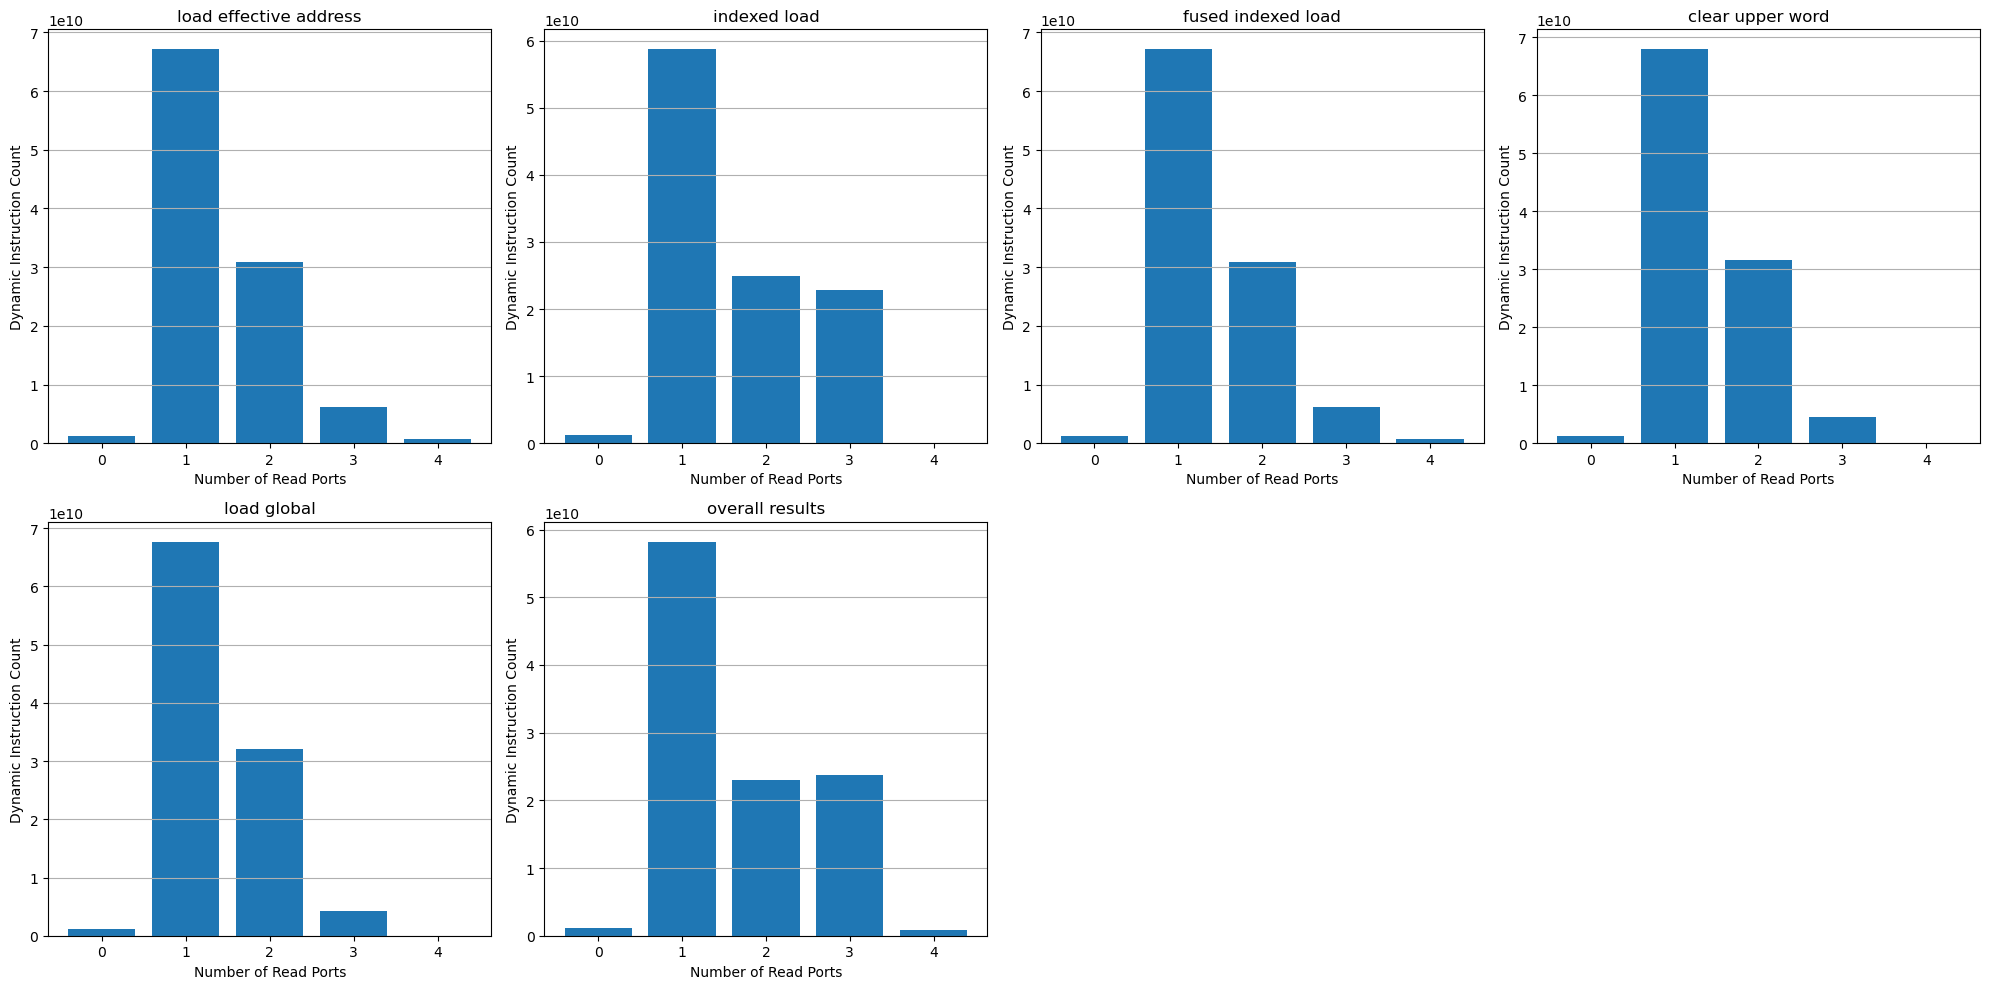

In [ ]:
num_groups = len(read_grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(read_grouped):
    data = group_data.reset_index()
    axes[i].bar(data['num_read_ports'], data['count'])
    axes[i].set_title(f'{group_name}')
    axes[i].set_xlabel('Number of Read Ports')
    axes[i].set_ylabel('Dynamic Instruction Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    # axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(read_img_path, dpi=300, bbox_inches='tight')
plt.show()

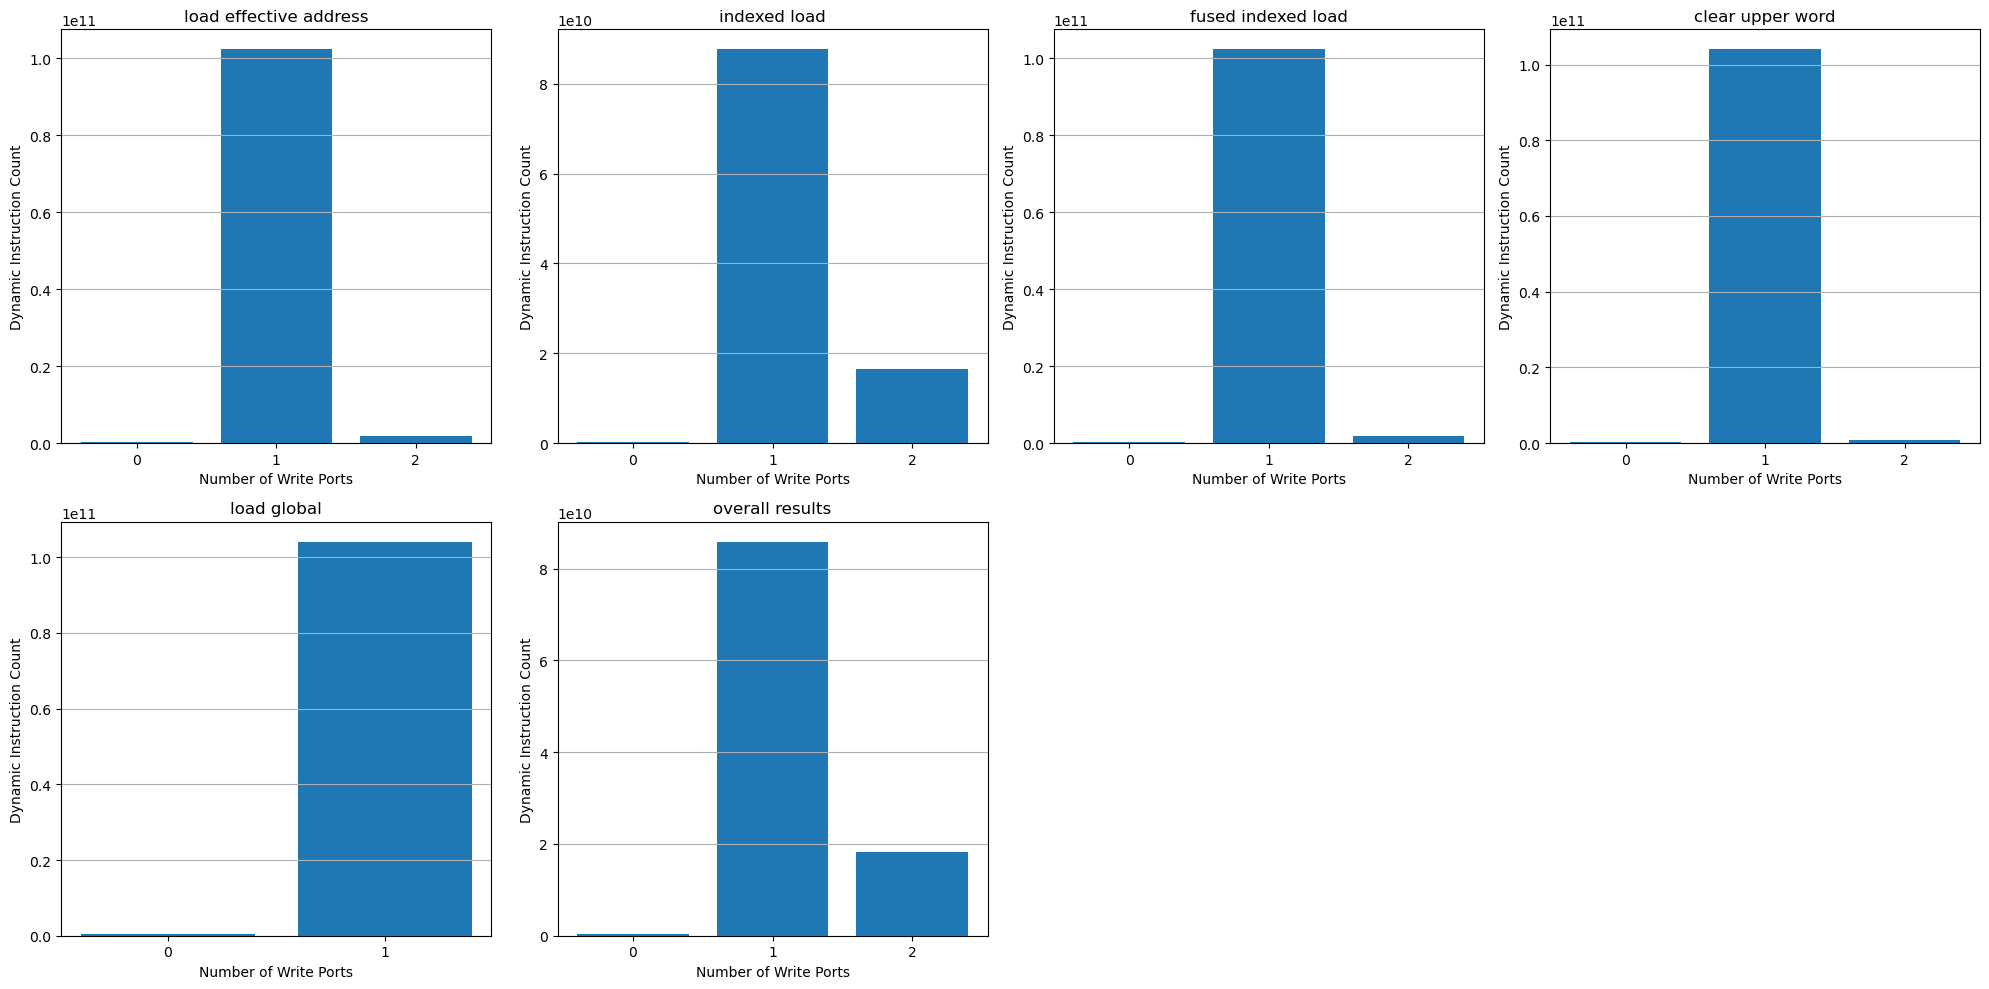

In [ ]:
num_groups = len(write_grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(write_grouped):
    data = group_data.reset_index()
    axes[i].bar(data['num_write_ports'], data['count'])
    axes[i].set_title(f'{group_name}')
    axes[i].set_xlabel('Number of Write Ports')
    axes[i].set_ylabel('Dynamic Instruction Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    # axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(write_img_path, dpi=300, bbox_inches='tight')
plt.show()